In [1]:
using Plots
include("./torontonian.jl");
include("./tor_tests.jl"); #this line also runs all the tests in the file

Test Summary:                                                         | Pass  Total
Torontonian tests                                                     |  615    615
  Torontonian (from definition) vs. analytical result                 |  204    204
  Torontonian (recursive) vs. analytical result                       |  204    204
  Torontonian (from definition) vs. Torontonian (recursive)           |  204    204
  Torontonian of two-mode squeezed vacuum with mean photon number 1.0 |    3      3
Test Summary:          | Pass  Total
probabilities sum to 1 |   18     18
Test Summary:                           | Pass  Total
probabilities are equal in both methods | 2044   2044


In [2]:
#checking that the Torontonian function (from definition) gives the correct analytical results
@testset "Torontonian (from definition) vs. analytical result" begin
    for i = 2:1:13
        for k = 1.1:0.37:7.3
            @test isapprox(analytical_tor(i, k), tor(gen_omats(i, k)))
        end
    end
end;

Test Summary:                                       | Pass  Total
Torontonian (from definition) vs. analytical result |  204    204


In [3]:
#checking that the Torontonian function (recursive) gives the correct analytical results
@testset "Torontonian (recursive) vs. analytical result" begin
    for i = 2:1:13
        for k = 1.1:0.37:7.3
            @test isapprox(analytical_tor(i, k), rec_tor(gen_omats(i, k)))
        end
    end
end;

Test Summary:                                 | Pass  Total
Torontonian (recursive) vs. analytical result |  204    204


In [4]:
#Computing threshold detection probabilities
N = 4 #number of modes
cov = random_covariance(N) #rendom covariance matrix
println("pattern", " | ", "prob (definition)", " | ", "prob (recursive)")
for p in product([[0 1] for i = 1:N]...) #this line generates all possible detection patterns
    pattern = collect(p)
    prob_df = threshold_detection_prob(cov, pattern, recursive = false)
    prob_rc = threshold_detection_prob(cov, pattern, recursive = true)
    println(pattern, " | ", real(prob_df), " | ", real(prob_rc))
end

pattern | prob (definition) | prob (recursive)
[0, 0, 0, 0] | 0.13543860662882612 | 0.13543860662882612
[1, 0, 0, 0] | 0.02996597596425695 | 0.02996597596425695
[0, 1, 0, 0] | 0.018840228355470334 | 0.018840228355470334
[1, 1, 0, 0] | 0.13184194972928487 | 0.1318419497292849
[0, 0, 1, 0] | 0.034656518529527065 | 0.034656518529527065
[1, 0, 1, 0] | 0.06783472653134427 | 0.06783472653134426
[0, 1, 1, 0] | 0.020319533214700446 | 0.020319533214700446
[1, 1, 1, 0] | 0.15754482696749972 | 0.15754482696749972
[0, 0, 0, 1] | 0.03245969932562434 | 0.03245969932562434
[1, 0, 0, 1] | 0.013286279096497513 | 0.013286279096497513
[0, 1, 0, 1] | 0.0386624819593339 | 0.0386624819593339
[1, 1, 0, 1] | 0.11184599304522637 | 0.11184599304522638
[0, 0, 1, 1] | 0.013982949794088035 | 0.013982949794088033
[1, 0, 1, 1] | 0.03246507079157154 | 0.032465070791571536
[0, 1, 1, 1] | 0.03258554384201878 | 0.032585543842018776
[1, 1, 1, 1] | 0.12826961622472974 | 0.1282696162247297


In [5]:
#time of computation
modes = Array{Int64}(undef, 0);
time_def = Array{Float64}(undef, 0);
time_rec = Array{Float64}(undef, 0);
for N in 6:1:20
    modes = vcat(modes, N)
    A = gen_omats(N, 7.5)
    time_def = vcat(time_def, @elapsed tor(A))
    time_rec = vcat(time_rec, @elapsed rec_tor(A))
end

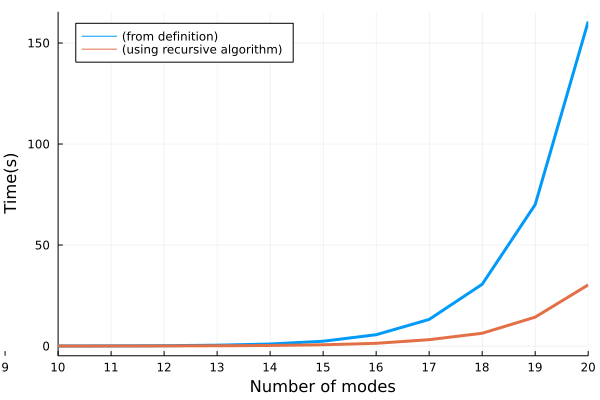

In [6]:
plot(modes, [time_def, time_rec],
    labels=["(from definition)" "(using recursive algorithm)"],
    lw=3,  
    legend=:topleft,
    xticks=(6:20, 6:20),
    xlims=(10,20)
    )
xlabel!("Number of modes")
ylabel!("Time(s)")

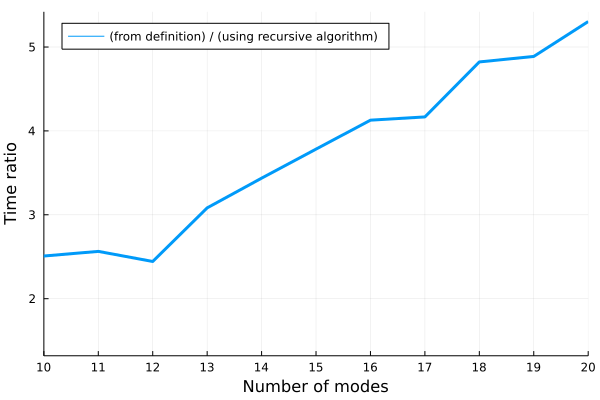

In [7]:
plot(modes, [time_def ./ time_rec],
    labels= "(from definition) / (using recursive algorithm)",
    lw=3,  
    legend=:topleft,
    xticks=(6:20, 6:20),
    xlims=(10,20)
    )
xlabel!("Number of modes")
ylabel!("Time ratio")